**Name - Rishita Chauhan**

**Phone - 9711944870**

**LinkedIn - https://www.linkedin.com/in/rishita-chauhan-685b771a6/**

In [195]:
import pandas as pd
import numpy as np
import re
import nltk
import warnings
import seaborn as s
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [219]:
# data = pd.read_csv(r"E:\Downloads\2022_02_08-02_30_31_AM.csv")
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [220]:
data=pd.read_csv('/content/drive/MyDrive/assign/2022_02_08-02_30_31_AM.csv')

In [141]:
data

,uuid,price_string,price_string_unf,product_type,level_1,category
0,638744a4-b0ae-4166-8cb6-5c063c862036,NaN,NaN,TGFwdG9wIENvdmVycy9CYWdz,TGFwdG9wIENhc2U,RWxlY3Ryb25pY3M
1,ab313969-02cc-48b2-9daf-0054efb70b92,NaN,NaN,QmFraW5nIEN1cHMgYW5kIE1hdHM,QmFraW5nIE1hdHMgLyBCYWtpbmcgZGlzaA,a2l0Y2hpbmcgYW5kIGRpbmluZw
2,acbd66ff-79f8-467a-91f9-108a45af5626,$19.95,NaN,R3VtbWllcyB2aXRhbWlucyBhbmQgbWluZXJhbHMgZm9yIG...,SW1tdW5pdHkgZ3VtbWllcw,SGVhbHRo
3,963915d6-b2e3-4098-b242-9410593cf205,$92.00,NaN,U2VydW1z,RmFjZSBTZXJ1bQ,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl
4,b5b68f3c-b1e0-40e5-8ee5-e2f7236c1daf,11.50,NaN,RWF0aW5nIFV0ZW5zaWxzL0N1dGxlcnk,Q2hvcHN0aWNrcw,a2l0Y2hpbmcgYW5kIGRpbmluZw
...,...,...,...,...,...,...
13729995,2a13338e-9268-4f7b-9e7c-b8c41c72971b,NaN,NaN,RHJlc3Nlcw,TWF4aSBkcmVzcw,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
13729996,fcaedae7-dc20-4da1-b4ae-77368c973088,$69.99,NaN,Um9vbSBkZWNvcg,UGxhbnRlcnMvVmFzZXM,SG91c2Vob2xkIGFuZCBDbGVhbmluZw
13729997,679f073a-862a-4e43-b5ce-41e45afd3bfa,NaN,NaN,UGV0IEZvb2Q,RHJ5IERvZyBGb29k,cGV0IHN1cHBsaWVz
13729998,25677eee-c26b-4abf-bd10-ca77a800ba26,NaN,NaN,U2F1Y2U,QkJRIFNhdWNl,Z3JvY2VyaWVz


**Dropping duplicates**

In [142]:
data.drop_duplicates(inplace = True)
data

,uuid,price_string,price_string_unf,product_type,level_1,category
0,638744a4-b0ae-4166-8cb6-5c063c862036,NaN,NaN,TGFwdG9wIENvdmVycy9CYWdz,TGFwdG9wIENhc2U,RWxlY3Ryb25pY3M
1,ab313969-02cc-48b2-9daf-0054efb70b92,NaN,NaN,QmFraW5nIEN1cHMgYW5kIE1hdHM,QmFraW5nIE1hdHMgLyBCYWtpbmcgZGlzaA,a2l0Y2hpbmcgYW5kIGRpbmluZw
2,acbd66ff-79f8-467a-91f9-108a45af5626,$19.95,NaN,R3VtbWllcyB2aXRhbWlucyBhbmQgbWluZXJhbHMgZm9yIG...,SW1tdW5pdHkgZ3VtbWllcw,SGVhbHRo
3,963915d6-b2e3-4098-b242-9410593cf205,$92.00,NaN,U2VydW1z,RmFjZSBTZXJ1bQ,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl
4,b5b68f3c-b1e0-40e5-8ee5-e2f7236c1daf,11.50,NaN,RWF0aW5nIFV0ZW5zaWxzL0N1dGxlcnk,Q2hvcHN0aWNrcw,a2l0Y2hpbmcgYW5kIGRpbmluZw
...,...,...,...,...,...,...
7751,a1170e06-ec36-4530-82a2-0374969a059e,$14.49,NaN,Q29va2luZyBPaWw,Q29jb251dCBPaWw,Z3JvY2VyaWVz
8538,b282d3e4-9d7a-48c9-9d68-4856c51f545b,$12.99,NaN,UGV0IFNoYW1wb28vQ29uZGl0aW9uZXI,UHVwcHkgU2hhbXBvbw,cGV0IHN1cHBsaWVz
8788,62785956-705e-47db-bd0e-764575333724,NaN,NaN,TWF0ZXJuaXR5IFRzaGlydA,TWF0ZXJuaXR5IFNob3J0IHNsZWV2ZSB0ZWU,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
8873,b4799645-56ab-4b83-8666-1b79cbf6da17,NaN,NaN,WW9nYSBNYXRz,RWNvIGZyaWVuZGx5IHlvZ2EgbWF0cw,SGVhbHRo


### 1. Products without prices

In [143]:
data.isnull().sum()

uuid                   0
price_string         822
price_string_unf    1342
product_type           1
level_1                5
category               1
dtype: int64

There are 822 products with no price (Nan values in price string)

In [144]:
no_price = data[data['price_string'].isnull()&data['price_string_unf'].isnull()]
no_price

,uuid,price_string,price_string_unf,product_type,level_1,category
0,638744a4-b0ae-4166-8cb6-5c063c862036,NaN,NaN,TGFwdG9wIENvdmVycy9CYWdz,TGFwdG9wIENhc2U,RWxlY3Ryb25pY3M
1,ab313969-02cc-48b2-9daf-0054efb70b92,NaN,NaN,QmFraW5nIEN1cHMgYW5kIE1hdHM,QmFraW5nIE1hdHMgLyBCYWtpbmcgZGlzaA,a2l0Y2hpbmcgYW5kIGRpbmluZw
5,389d9f75-cc3f-4bd2-94f7-93e381a3bed5,NaN,NaN,TmF0dXJhbCBTd2VldGVuZXJzLyBTdWdhcg,TW9uayBGcnVpdA,Z3JvY2VyaWVz
13,1f2766ec-0a27-43f8-b28b-77a44492ead1,NaN,NaN,U2NydWJzIGFuZCBjbGVhbmluZyBjbG90aHM,U2NydWJz,SG91c2Vob2xkIGFuZCBDbGVhbmluZw
16,7bad39f5-74b9-4611-afb9-46fb135190cd,NaN,NaN,UGx1cyBzaXplIHdlYXIgZHJlc3M,RHJlc3M,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
...,...,...,...,...,...,...
7024,c174d758-aa8f-4c1c-afa9-2ded6e6b6a0d,NaN,NaN,VGVh,VGVhYmFncw,Z3JvY2VyaWVz
7131,0c4f4319-4a18-4edc-a40d-133b3f4cef5c,NaN,NaN,QnJ1c2hlcw,RGlzaCBicnVzaA,SG91c2Vob2xkIGFuZCBDbGVhbmluZw
7456,2d4deea7-b7c2-4342-8488-337c5eacaa84,NaN,NaN,bWVucyBzd2VhdGVycw,SG9vZGll,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
8788,62785956-705e-47db-bd0e-764575333724,NaN,NaN,TWF0ZXJuaXR5IFRzaGlydA,TWF0ZXJuaXR5IFNob3J0IHNsZWV2ZSB0ZWU,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz


There are 815 such products for which both 'price_string' and 'price_string_unf' are null. Hence, there are 815 products for which prices are not specified.

### 2. Count of products without prices and with prices in each Product Type, Category, Level 1

In [145]:
product_with_prices = data[data['price_string'].notnull() | data['price_string_unf'].notnull()]
product_with_prices

,uuid,price_string,price_string_unf,product_type,level_1,category
2,acbd66ff-79f8-467a-91f9-108a45af5626,$19.95,NaN,R3VtbWllcyB2aXRhbWlucyBhbmQgbWluZXJhbHMgZm9yIG...,SW1tdW5pdHkgZ3VtbWllcw,SGVhbHRo
3,963915d6-b2e3-4098-b242-9410593cf205,$92.00,NaN,U2VydW1z,RmFjZSBTZXJ1bQ,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl
4,b5b68f3c-b1e0-40e5-8ee5-e2f7236c1daf,11.50,NaN,RWF0aW5nIFV0ZW5zaWxzL0N1dGxlcnk,Q2hvcHN0aWNrcw,a2l0Y2hpbmcgYW5kIGRpbmluZw
6,9599f1a9-d406-43eb-89f5-9b1c0af1ac9a,$24.99,NaN,TW9wcyBhbmQgYnJvb21z,TW9w,SG91c2Vob2xkIGFuZCBDbGVhbmluZw
7,35799087-f6f4-4ca2-abfe-cbb5c27d2f1a,$148.00,NaN,V29tZW5zIFBhbnRz,V29tZW5zIFJlZ3VsYXIvQ2FzdWFsIFBhbnRz,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
...,...,...,...,...,...,...
6879,edd8e3f9-fed5-4513-a3b1-ec2914e4a3ee,$80.00,NaN,RHJlc3Nlcw,Q2FzdWFsIGRyZXNz,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
7396,277d470c-01c0-4969-9b20-9bde574d3352,$69.99,NaN,V2F0ZXIgRmlsdGVyIERpc3BlbnNlcg,NSBHYWxsb24,VG9vbHMgYW5kIGhvbWUgaW1wcm92ZW1lbnQ
7751,a1170e06-ec36-4530-82a2-0374969a059e,$14.49,NaN,Q29va2luZyBPaWw,Q29jb251dCBPaWw,Z3JvY2VyaWVz
8538,b282d3e4-9d7a-48c9-9d68-4856c51f545b,$12.99,NaN,UGV0IFNoYW1wb28vQ29uZGl0aW9uZXI,UHVwcHkgU2hhbXBvbw,cGV0IHN1cHBsaWVz


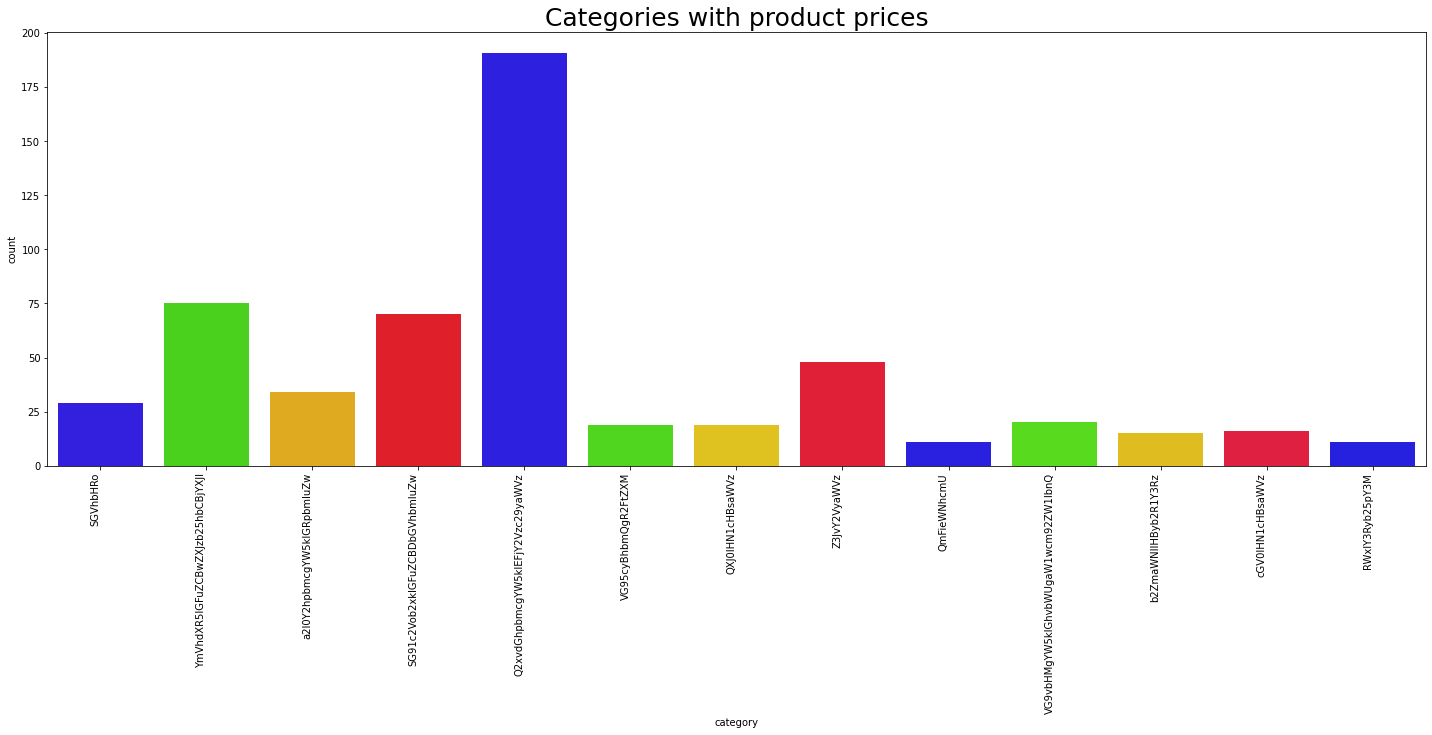

In [213]:
plt.rcParams['figure.figsize']=(20,10)
ax = s.countplot(product_with_prices['category'],palette='prism')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.title('Categories with product prices',fontsize=25)
plt.show()

**Count of products with prices in each Product Type, Category, Level 1**

In [156]:
level1_with_prices = product_with_prices[['level_1','uuid']].groupby(['level_1']).count()
category_with_prices = product_with_prices[['category','uuid']].groupby(['category']).count()
productType_with_prices = product_with_prices[['product_type','uuid']].groupby(['product_type']).count()
display(level1_with_prices)
display(category_with_prices)
display(productType_with_prices)

,uuid
level_1,
MTAgQ3Vw,1
MjAgQ3Vw,1
MjAgUGludHM,1
MzAgQ3Vw,1
MzAtIDM1IFBpbnRz,1
...,...
d29tZW5zIGJvb3Rz,2
d29tZW5zIGhlZWxz,1
eW9nYSBCbG9ja3M,2


,uuid
category,
Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz,191
QXJ0IHN1cHBsaWVz,19
QmFieWNhcmU,11
RWxlY3Ryb25pY3M,11
SG91c2Vob2xkIGFuZCBDbGVhbmluZw,70
SGVhbHRo,29
VG95cyBhbmQgR2FtZXM,19
VG9vbHMgYW5kIGhvbWUgaW1wcm92ZW1lbnQ,20
YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl,75


,uuid
product_type,
Q29mZmVlIEJlYW5z,3
Q29uZGl0aW9uZXIgSGFpcg,1
Q29va2luZyBPaWw,7
Q29va2luZyBVdGVuc2lscw,11
Q2FuZGxlcy9GcmFnbmFuY2Vz,4
...,...
cGV0IEJlZC9NYXR0cmVzc2Vz,1
cGV0IEJsYW5rZXQ,1
d29tZW5zIE91dGVyd2Vhcg,13


In [153]:
product_without_prices = data[data['price_string'].isnull() & data['price_string_unf'].isnull()]
product_without_prices

,uuid,price_string,price_string_unf,product_type,level_1,category
0,638744a4-b0ae-4166-8cb6-5c063c862036,NaN,NaN,TGFwdG9wIENvdmVycy9CYWdz,TGFwdG9wIENhc2U,RWxlY3Ryb25pY3M
1,ab313969-02cc-48b2-9daf-0054efb70b92,NaN,NaN,QmFraW5nIEN1cHMgYW5kIE1hdHM,QmFraW5nIE1hdHMgLyBCYWtpbmcgZGlzaA,a2l0Y2hpbmcgYW5kIGRpbmluZw
5,389d9f75-cc3f-4bd2-94f7-93e381a3bed5,NaN,NaN,TmF0dXJhbCBTd2VldGVuZXJzLyBTdWdhcg,TW9uayBGcnVpdA,Z3JvY2VyaWVz
13,1f2766ec-0a27-43f8-b28b-77a44492ead1,NaN,NaN,U2NydWJzIGFuZCBjbGVhbmluZyBjbG90aHM,U2NydWJz,SG91c2Vob2xkIGFuZCBDbGVhbmluZw
16,7bad39f5-74b9-4611-afb9-46fb135190cd,NaN,NaN,UGx1cyBzaXplIHdlYXIgZHJlc3M,RHJlc3M,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
...,...,...,...,...,...,...
7024,c174d758-aa8f-4c1c-afa9-2ded6e6b6a0d,NaN,NaN,VGVh,VGVhYmFncw,Z3JvY2VyaWVz
7131,0c4f4319-4a18-4edc-a40d-133b3f4cef5c,NaN,NaN,QnJ1c2hlcw,RGlzaCBicnVzaA,SG91c2Vob2xkIGFuZCBDbGVhbmluZw
7456,2d4deea7-b7c2-4342-8488-337c5eacaa84,NaN,NaN,bWVucyBzd2VhdGVycw,SG9vZGll,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
8788,62785956-705e-47db-bd0e-764575333724,NaN,NaN,TWF0ZXJuaXR5IFRzaGlydA,TWF0ZXJuaXR5IFNob3J0IHNsZWV2ZSB0ZWU,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz


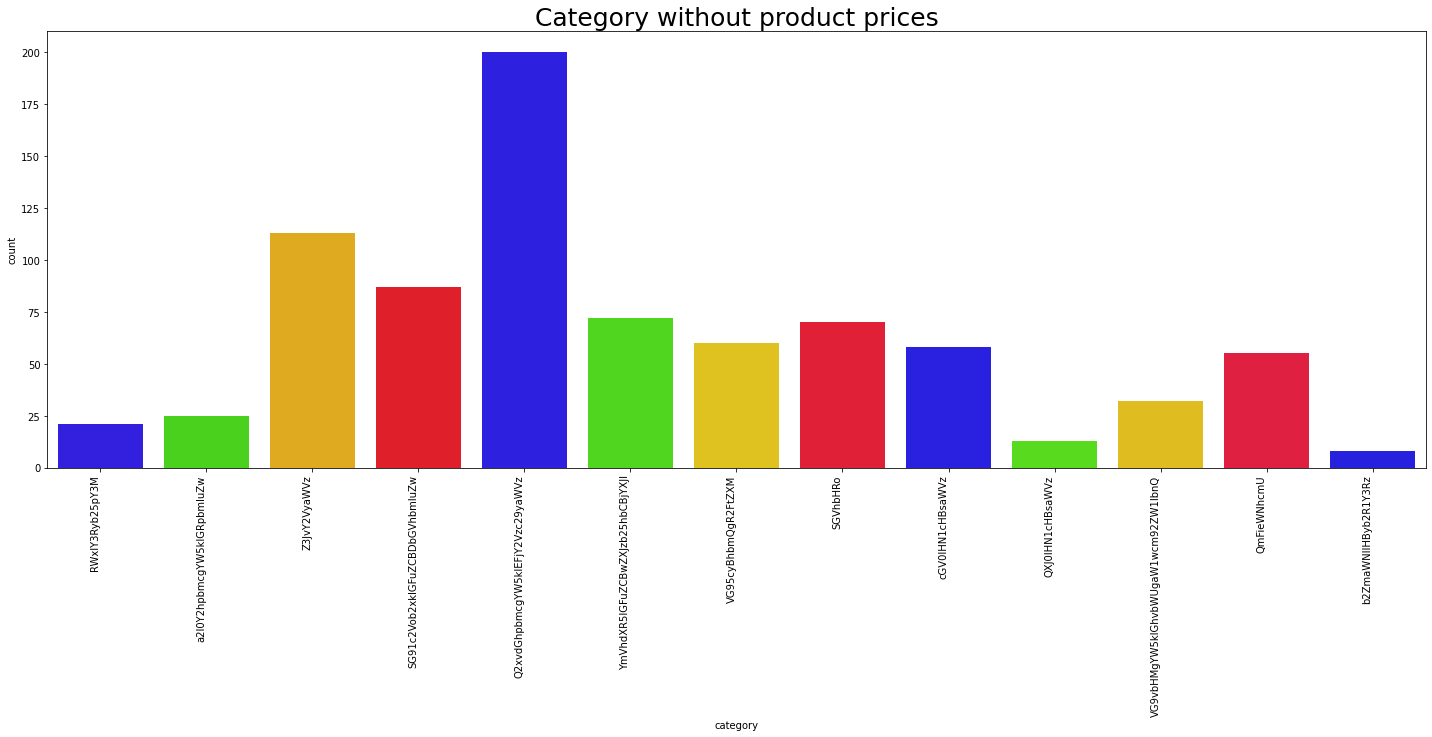

In [214]:
plt.rcParams['figure.figsize']=(20,10)
ax = s.countplot(product_without_prices['category'],palette='prism')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.title('Category without product prices',fontsize=25)
plt.show()

**Count of products without prices in each Product Type, Category, Level 1**

In [160]:
level1_without_prices = product_without_prices[['level_1','uuid']].groupby(['level_1']).count()
category_without_prices = product_without_prices[['category','uuid']].groupby(['category']).count()
productType_without_prices = product_without_prices[['product_type','uuid']].groupby(['product_type']).count()
display(level1_without_prices)
display(category_without_prices)
display(productType_without_prices)

,uuid
level_1,
MjAgUGludHM,2
MzAtIDM1IFBpbnRz,1
NTAgUGludHM,2
Q0FUIExJVFRFUg,3
Q290dG9uIFBhZHM,2
...,...
d29tZW5zIFNhbmRhbHMvU2xpcCBvbnM,2
d29tZW5zIFdhbGxldA,1
d29tZW5zIGJvb3Rz,2


,uuid
category,
Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz,200
QXJ0IHN1cHBsaWVz,13
QmFieWNhcmU,55
RWxlY3Ryb25pY3M,21
SG91c2Vob2xkIGFuZCBDbGVhbmluZw,87
SGVhbHRo,70
VG95cyBhbmQgR2FtZXM,60
VG9vbHMgYW5kIGhvbWUgaW1wcm92ZW1lbnQ,32
YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl,72


,uuid
product_type,
Q0FUIExJVFRFUg,3
Q29mZmVlIEJlYW5z,5
Q29mZmVlIEZpbHRlcnM,1
Q29uZGl0aW9uZXIgSGFpcg,2
Q29va2llcw,3
...,...
cGV0IEJsYW5rZXQ,1
cGV0IFN0YWluIGFuZCBvZG9yIGVsaW1pbmF0b3I,1
d29tZW5zIE91dGVyd2Vhcg,2


**Count of products without prices and with prices in each Product Type, Category, Level 1**

In [177]:
level1 = pd.concat([level1_with_prices, level1_without_prices], axis=1, join="outer", ignore_index=True)
category = pd.concat([category_with_prices, category_without_prices], axis=1, join="outer", ignore_index=True)
productType = pd.concat([productType_with_prices, productType_without_prices], axis=1, join="outer", ignore_index=True)
productType = productType.fillna(0)
category = category.fillna(0)
level1 = level1.fillna(0)
level1.rename(columns = {0:'count_with_prices', 1: 'count_without_prices'}, inplace = True)
category.rename(columns = {0:'count_with_prices', 1: 'count_without_prices'}, inplace = True)
productType.rename(columns = {0:'count_with_prices', 1: 'count_without_prices'}, inplace = True)
l = [level1,category,productType]
for i in l:
  i['count_with_prices'] = i['count_with_prices'].astype(int)
  i['count_without_prices'] = i['count_without_prices'].astype(int)

for i in l:
  display(i)

,count_with_prices,count_without_prices
level_1,,
MTAgQ3Vw,1,0
MjAgQ3Vw,1,0
MjAgUGludHM,1,2
MzAgQ3Vw,1,0
MzAtIDM1IFBpbnRz,1,1
...,...,...
aVBhZCBDYXNl,0,3
aVBob25lIENhc2U,0,2
bWVucyBCb2R5d2FzaA,0,1


,count_with_prices,count_without_prices
category,,
Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz,191,200
QXJ0IHN1cHBsaWVz,19,13
QmFieWNhcmU,11,55
RWxlY3Ryb25pY3M,11,21
SG91c2Vob2xkIGFuZCBDbGVhbmluZw,70,87
SGVhbHRo,29,70
VG95cyBhbmQgR2FtZXM,19,60
VG9vbHMgYW5kIGhvbWUgaW1wcm92ZW1lbnQ,20,32
YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl,75,72


,count_with_prices,count_without_prices
product_type,,
Q29mZmVlIEJlYW5z,3,5
Q29uZGl0aW9uZXIgSGFpcg,1,2
Q29va2luZyBPaWw,7,1
Q29va2luZyBVdGVuc2lscw,11,2
Q2FuZGxlcy9GcmFnbmFuY2Vz,4,2
...,...,...
VmVoaWNsZSBUb3lz,0,12
bGFjdG9zZSBmcmVlIEJhYnkgRm9ybXVsYQ,0,1
bWVucyBCb2R5IFNvYXAvIEJvZHl3YXNo,0,1


3. Correct Product Prices in the correct format (eg: $56) wherever possible and separate them into currency and value columns.

In [181]:
data.dropna(subset=['price_string', 'price_string_unf'], how='all', inplace=True)
data

,uuid,price_string,price_string_unf,product_type,level_1,category
2,acbd66ff-79f8-467a-91f9-108a45af5626,$19.95,NaN,R3VtbWllcyB2aXRhbWlucyBhbmQgbWluZXJhbHMgZm9yIG...,SW1tdW5pdHkgZ3VtbWllcw,SGVhbHRo
3,963915d6-b2e3-4098-b242-9410593cf205,$92.00,NaN,U2VydW1z,RmFjZSBTZXJ1bQ,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl
4,b5b68f3c-b1e0-40e5-8ee5-e2f7236c1daf,11.50,NaN,RWF0aW5nIFV0ZW5zaWxzL0N1dGxlcnk,Q2hvcHN0aWNrcw,a2l0Y2hpbmcgYW5kIGRpbmluZw
6,9599f1a9-d406-43eb-89f5-9b1c0af1ac9a,$24.99,NaN,TW9wcyBhbmQgYnJvb21z,TW9w,SG91c2Vob2xkIGFuZCBDbGVhbmluZw
7,35799087-f6f4-4ca2-abfe-cbb5c27d2f1a,$148.00,NaN,V29tZW5zIFBhbnRz,V29tZW5zIFJlZ3VsYXIvQ2FzdWFsIFBhbnRz,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
...,...,...,...,...,...,...
6879,edd8e3f9-fed5-4513-a3b1-ec2914e4a3ee,$80.00,NaN,RHJlc3Nlcw,Q2FzdWFsIGRyZXNz,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
7396,277d470c-01c0-4969-9b20-9bde574d3352,$69.99,NaN,V2F0ZXIgRmlsdGVyIERpc3BlbnNlcg,NSBHYWxsb24,VG9vbHMgYW5kIGhvbWUgaW1wcm92ZW1lbnQ
7751,a1170e06-ec36-4530-82a2-0374969a059e,$14.49,NaN,Q29va2luZyBPaWw,Q29jb251dCBPaWw,Z3JvY2VyaWVz
8538,b282d3e4-9d7a-48c9-9d68-4856c51f545b,$12.99,NaN,UGV0IFNoYW1wb28vQ29uZGl0aW9uZXI,UHVwcHkgU2hhbXBvbw,cGV0IHN1cHBsaWVz


**Flitering Unfiltered price string**

In [182]:
required_infiltered_data = data[data['price_string'].isnull()]
required_infiltered_data

,uuid,price_string,price_string_unf,product_type,level_1,category
61,13724827-979f-4019-9ff1-b44e57af5802,NaN,Current price: \n$359.00,U3Ryb2xsZXJzL0NhciBzZWF0cy8gQWNjZXNzb3JpZXM,Q2FyIHNlYXRz,QmFieWNhcmU
208,51bd7faa-718b-494b-89e0-1a59891da07b,NaN,$41 USD,TWF0ZXJuaXR5IFRzaGlydA,TWF0ZXJuaXR5IFNob3J0IHNsZWV2ZSB0ZWU,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
321,ff30484a-a51c-4027-b9b7-12ee239b3a94,NaN,$248.00\n\n\n\n$104.50 - $248.00,UGx1cyBzaXplIHdlYXI,Q29hdC9KYWNrZXQ,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
434,22c4b6af-6809-4ea1-9f1c-802a19246025,NaN,Current price: \n$329.40,U3Ryb2xsZXJzL0NhciBzZWF0cy8gQWNjZXNzb3JpZXM,U3Ryb2xsZXJz,QmFieWNhcmU
637,548a7381-b382-41db-bf06-4dae79857d87,NaN,$85 USD,TWF0ZXJuaXR5IFdlYXI,TWF0ZXJuaXR5IFNraXJ0,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
1202,ce5f2b6d-06a8-4231-b358-835905a314fa,NaN,$138.00\n\n\n\n$96.60,UGx1cyBzaXplIHdlYXIgc2tpcnQ,U2tpcnQ,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
2321,2441f06d-3590-443c-9353-f2f06087d61b,NaN,$80 USD,TWF0ZXJuaXR5IERyZXNz,TWF0ZXJuaXR5IFBhcnR5IERyZXNz,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz


In [183]:
required_infiltered_data['price_string_unf'] = required_infiltered_data.apply(lambda row: nltk.word_tokenize(row['price_string_unf']), axis=1)
required_infiltered_data

,uuid,price_string,price_string_unf,product_type,level_1,category
61,13724827-979f-4019-9ff1-b44e57af5802,NaN,"[Current, price, :, $, 359.00]",U3Ryb2xsZXJzL0NhciBzZWF0cy8gQWNjZXNzb3JpZXM,Q2FyIHNlYXRz,QmFieWNhcmU
208,51bd7faa-718b-494b-89e0-1a59891da07b,NaN,"[$, 41, USD]",TWF0ZXJuaXR5IFRzaGlydA,TWF0ZXJuaXR5IFNob3J0IHNsZWV2ZSB0ZWU,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
321,ff30484a-a51c-4027-b9b7-12ee239b3a94,NaN,"[$, 248.00, $, 104.50, -, $, 248.00]",UGx1cyBzaXplIHdlYXI,Q29hdC9KYWNrZXQ,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
434,22c4b6af-6809-4ea1-9f1c-802a19246025,NaN,"[Current, price, :, $, 329.40]",U3Ryb2xsZXJzL0NhciBzZWF0cy8gQWNjZXNzb3JpZXM,U3Ryb2xsZXJz,QmFieWNhcmU
637,548a7381-b382-41db-bf06-4dae79857d87,NaN,"[$, 85, USD]",TWF0ZXJuaXR5IFdlYXI,TWF0ZXJuaXR5IFNraXJ0,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
1202,ce5f2b6d-06a8-4231-b358-835905a314fa,NaN,"[$, 138.00, $, 96.60]",UGx1cyBzaXplIHdlYXIgc2tpcnQ,U2tpcnQ,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
2321,2441f06d-3590-443c-9353-f2f06087d61b,NaN,"[$, 80, USD]",TWF0ZXJuaXR5IERyZXNz,TWF0ZXJuaXR5IFBhcnR5IERyZXNz,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz


In [184]:
def filter_d(text):
    tokens = ""
    for i in text:
      if check_float(i):
        tokens = i
        break
    if len(tokens)!=0:
      tokens= "$" + tokens
    return tokens

def check_float(text):
  res = text.replace('.', '', 1).isdigit()
  return res

required_infiltered_data['price_string']= required_infiltered_data['price_string_unf'].apply(lambda x: filter_d(x))
required_infiltered_data

,uuid,price_string,price_string_unf,product_type,level_1,category
61,13724827-979f-4019-9ff1-b44e57af5802,$359.00,"[Current, price, :, $, 359.00]",U3Ryb2xsZXJzL0NhciBzZWF0cy8gQWNjZXNzb3JpZXM,Q2FyIHNlYXRz,QmFieWNhcmU
208,51bd7faa-718b-494b-89e0-1a59891da07b,$41,"[$, 41, USD]",TWF0ZXJuaXR5IFRzaGlydA,TWF0ZXJuaXR5IFNob3J0IHNsZWV2ZSB0ZWU,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
321,ff30484a-a51c-4027-b9b7-12ee239b3a94,$248.00,"[$, 248.00, $, 104.50, -, $, 248.00]",UGx1cyBzaXplIHdlYXI,Q29hdC9KYWNrZXQ,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
434,22c4b6af-6809-4ea1-9f1c-802a19246025,$329.40,"[Current, price, :, $, 329.40]",U3Ryb2xsZXJzL0NhciBzZWF0cy8gQWNjZXNzb3JpZXM,U3Ryb2xsZXJz,QmFieWNhcmU
637,548a7381-b382-41db-bf06-4dae79857d87,$85,"[$, 85, USD]",TWF0ZXJuaXR5IFdlYXI,TWF0ZXJuaXR5IFNraXJ0,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
1202,ce5f2b6d-06a8-4231-b358-835905a314fa,$138.00,"[$, 138.00, $, 96.60]",UGx1cyBzaXplIHdlYXIgc2tpcnQ,U2tpcnQ,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
2321,2441f06d-3590-443c-9353-f2f06087d61b,$80,"[$, 80, USD]",TWF0ZXJuaXR5IERyZXNz,TWF0ZXJuaXR5IFBhcnR5IERyZXNz,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz


In [185]:
data.update(required_infiltered_data)
data

,uuid,price_string,price_string_unf,product_type,level_1,category
2,acbd66ff-79f8-467a-91f9-108a45af5626,$19.95,NaN,R3VtbWllcyB2aXRhbWlucyBhbmQgbWluZXJhbHMgZm9yIG...,SW1tdW5pdHkgZ3VtbWllcw,SGVhbHRo
3,963915d6-b2e3-4098-b242-9410593cf205,$92.00,NaN,U2VydW1z,RmFjZSBTZXJ1bQ,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl
4,b5b68f3c-b1e0-40e5-8ee5-e2f7236c1daf,11.50,NaN,RWF0aW5nIFV0ZW5zaWxzL0N1dGxlcnk,Q2hvcHN0aWNrcw,a2l0Y2hpbmcgYW5kIGRpbmluZw
6,9599f1a9-d406-43eb-89f5-9b1c0af1ac9a,$24.99,NaN,TW9wcyBhbmQgYnJvb21z,TW9w,SG91c2Vob2xkIGFuZCBDbGVhbmluZw
7,35799087-f6f4-4ca2-abfe-cbb5c27d2f1a,$148.00,NaN,V29tZW5zIFBhbnRz,V29tZW5zIFJlZ3VsYXIvQ2FzdWFsIFBhbnRz,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
...,...,...,...,...,...,...
6879,edd8e3f9-fed5-4513-a3b1-ec2914e4a3ee,$80.00,NaN,RHJlc3Nlcw,Q2FzdWFsIGRyZXNz,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
7396,277d470c-01c0-4969-9b20-9bde574d3352,$69.99,NaN,V2F0ZXIgRmlsdGVyIERpc3BlbnNlcg,NSBHYWxsb24,VG9vbHMgYW5kIGhvbWUgaW1wcm92ZW1lbnQ
7751,a1170e06-ec36-4530-82a2-0374969a059e,$14.49,NaN,Q29va2luZyBPaWw,Q29jb251dCBPaWw,Z3JvY2VyaWVz
8538,b282d3e4-9d7a-48c9-9d68-4856c51f545b,$12.99,NaN,UGV0IFNoYW1wb28vQ29uZGl0aW9uZXI,UHVwcHkgU2hhbXBvbw,cGV0IHN1cHBsaWVz


**Formatting filtered price string**

In [186]:
data['price_string'].unique()

array(['$19.95', '$92.00', '11.50', '$24.99', '$148.00', '$89', '$14.95',
       '$55.00', '32.99', '52.00', '$11.30', '$13.99', '$6.95', '$0.00',
       '$129', '$10.99', '$6.49', '$18.99', '$179', '$9.99', '$3.99',
       '$549', '$16.99', '$49.99', '$359.00', '$90.00', '$12.99', '$59',
       '$85.00', '$128.00', '$150', '$6.99', '$34.00', '$248.00', '$4.99',
       '$65', '11.00', '$459', '$199', '14.95', '$135.05', '$1099',
       '$7.97', '$6.75', '$15.00', '$5.29', '$10.00', '7.00', '$80.00',
       '$2.29', '$119', '6.60', '$399', '$39.95', '12.00', '$8.99', '$79',
       '$35', '$34.95', '$99', '$18.95', '$459.99', '$58.00', '$25.70',
       '$3.50', '$619.00', '$95', '$159', '$41', '$45', '$149', '$85',
       '$8.95', '$69', '$14.00', '$38.00', '$6.50', '$12.50', '$24.00',
       '$27.00', '$82.75', '$9.95', '$26.96', '$17.96', '$15.99', '$6.17',
       '$75', '$250', '$29.00', '$1198', '$18.00', '$45.00', '$44.00',
       '$14.99', '$249', '$86.00', '$160', '$14.37', '$7.99

In [187]:
def format_string(text):
  if text!="":
    if not text.startswith("$"):
      text= text.strip()
      text = "$" + text
  return text

data['price_string'] = data['price_string'].fillna("")
data = data.astype({"price_string": str})
data['price_string']= data['price_string'].apply(lambda x: format_string(x))
data

,uuid,price_string,price_string_unf,product_type,level_1,category
2,acbd66ff-79f8-467a-91f9-108a45af5626,$19.95,NaN,R3VtbWllcyB2aXRhbWlucyBhbmQgbWluZXJhbHMgZm9yIG...,SW1tdW5pdHkgZ3VtbWllcw,SGVhbHRo
3,963915d6-b2e3-4098-b242-9410593cf205,$92.00,NaN,U2VydW1z,RmFjZSBTZXJ1bQ,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl
4,b5b68f3c-b1e0-40e5-8ee5-e2f7236c1daf,$11.50,NaN,RWF0aW5nIFV0ZW5zaWxzL0N1dGxlcnk,Q2hvcHN0aWNrcw,a2l0Y2hpbmcgYW5kIGRpbmluZw
6,9599f1a9-d406-43eb-89f5-9b1c0af1ac9a,$24.99,NaN,TW9wcyBhbmQgYnJvb21z,TW9w,SG91c2Vob2xkIGFuZCBDbGVhbmluZw
7,35799087-f6f4-4ca2-abfe-cbb5c27d2f1a,$148.00,NaN,V29tZW5zIFBhbnRz,V29tZW5zIFJlZ3VsYXIvQ2FzdWFsIFBhbnRz,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
...,...,...,...,...,...,...
6879,edd8e3f9-fed5-4513-a3b1-ec2914e4a3ee,$80.00,NaN,RHJlc3Nlcw,Q2FzdWFsIGRyZXNz,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
7396,277d470c-01c0-4969-9b20-9bde574d3352,$69.99,NaN,V2F0ZXIgRmlsdGVyIERpc3BlbnNlcg,NSBHYWxsb24,VG9vbHMgYW5kIGhvbWUgaW1wcm92ZW1lbnQ
7751,a1170e06-ec36-4530-82a2-0374969a059e,$14.49,NaN,Q29va2luZyBPaWw,Q29jb251dCBPaWw,Z3JvY2VyaWVz
8538,b282d3e4-9d7a-48c9-9d68-4856c51f545b,$12.99,NaN,UGV0IFNoYW1wb28vQ29uZGl0aW9uZXI,UHVwcHkgU2hhbXBvbw,cGV0IHN1cHBsaWVz


In [188]:
def tokenization(text):
    tokens = []
    if text!="":
      text = text.strip()
      if text.startswith("$"):
        tokens = ["$",text[1:].strip()]
      else:
        tokens = [np.nan,text]
    else:
      tockens = [np.nan,np.nan]
    return tokens

data['price_tockenized']= data['price_string'].apply(lambda x: tokenization(x))
data

,uuid,price_string,price_string_unf,product_type,level_1,category,price_tockenized
2,acbd66ff-79f8-467a-91f9-108a45af5626,$19.95,NaN,R3VtbWllcyB2aXRhbWlucyBhbmQgbWluZXJhbHMgZm9yIG...,SW1tdW5pdHkgZ3VtbWllcw,SGVhbHRo,"[$, 19.95]"
3,963915d6-b2e3-4098-b242-9410593cf205,$92.00,NaN,U2VydW1z,RmFjZSBTZXJ1bQ,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl,"[$, 92.00]"
4,b5b68f3c-b1e0-40e5-8ee5-e2f7236c1daf,$11.50,NaN,RWF0aW5nIFV0ZW5zaWxzL0N1dGxlcnk,Q2hvcHN0aWNrcw,a2l0Y2hpbmcgYW5kIGRpbmluZw,"[$, 11.50]"
6,9599f1a9-d406-43eb-89f5-9b1c0af1ac9a,$24.99,NaN,TW9wcyBhbmQgYnJvb21z,TW9w,SG91c2Vob2xkIGFuZCBDbGVhbmluZw,"[$, 24.99]"
7,35799087-f6f4-4ca2-abfe-cbb5c27d2f1a,$148.00,NaN,V29tZW5zIFBhbnRz,V29tZW5zIFJlZ3VsYXIvQ2FzdWFsIFBhbnRz,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz,"[$, 148.00]"
...,...,...,...,...,...,...,...
6879,edd8e3f9-fed5-4513-a3b1-ec2914e4a3ee,$80.00,NaN,RHJlc3Nlcw,Q2FzdWFsIGRyZXNz,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz,"[$, 80.00]"
7396,277d470c-01c0-4969-9b20-9bde574d3352,$69.99,NaN,V2F0ZXIgRmlsdGVyIERpc3BlbnNlcg,NSBHYWxsb24,VG9vbHMgYW5kIGhvbWUgaW1wcm92ZW1lbnQ,"[$, 69.99]"
7751,a1170e06-ec36-4530-82a2-0374969a059e,$14.49,NaN,Q29va2luZyBPaWw,Q29jb251dCBPaWw,Z3JvY2VyaWVz,"[$, 14.49]"
8538,b282d3e4-9d7a-48c9-9d68-4856c51f545b,$12.99,NaN,UGV0IFNoYW1wb28vQ29uZGl0aW9uZXI,UHVwcHkgU2hhbXBvbw,cGV0IHN1cHBsaWVz,"[$, 12.99]"


**Seperating prize and currency into columns**

In [189]:
data[['Currency','Price']] = pd.DataFrame(data["price_tockenized"].tolist(), index= data.index)
data.drop('price_tockenized',inplace=True,axis=1)
data

,uuid,price_string,price_string_unf,product_type,level_1,category,Currency,Price
2,acbd66ff-79f8-467a-91f9-108a45af5626,$19.95,NaN,R3VtbWllcyB2aXRhbWlucyBhbmQgbWluZXJhbHMgZm9yIG...,SW1tdW5pdHkgZ3VtbWllcw,SGVhbHRo,$,19.95
3,963915d6-b2e3-4098-b242-9410593cf205,$92.00,NaN,U2VydW1z,RmFjZSBTZXJ1bQ,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl,$,92.00
4,b5b68f3c-b1e0-40e5-8ee5-e2f7236c1daf,$11.50,NaN,RWF0aW5nIFV0ZW5zaWxzL0N1dGxlcnk,Q2hvcHN0aWNrcw,a2l0Y2hpbmcgYW5kIGRpbmluZw,$,11.50
6,9599f1a9-d406-43eb-89f5-9b1c0af1ac9a,$24.99,NaN,TW9wcyBhbmQgYnJvb21z,TW9w,SG91c2Vob2xkIGFuZCBDbGVhbmluZw,$,24.99
7,35799087-f6f4-4ca2-abfe-cbb5c27d2f1a,$148.00,NaN,V29tZW5zIFBhbnRz,V29tZW5zIFJlZ3VsYXIvQ2FzdWFsIFBhbnRz,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz,$,148.00
...,...,...,...,...,...,...,...,...
6879,edd8e3f9-fed5-4513-a3b1-ec2914e4a3ee,$80.00,NaN,RHJlc3Nlcw,Q2FzdWFsIGRyZXNz,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz,$,80.00
7396,277d470c-01c0-4969-9b20-9bde574d3352,$69.99,NaN,V2F0ZXIgRmlsdGVyIERpc3BlbnNlcg,NSBHYWxsb24,VG9vbHMgYW5kIGhvbWUgaW1wcm92ZW1lbnQ,$,69.99
7751,a1170e06-ec36-4530-82a2-0374969a059e,$14.49,NaN,Q29va2luZyBPaWw,Q29jb251dCBPaWw,Z3JvY2VyaWVz,$,14.49
8538,b282d3e4-9d7a-48c9-9d68-4856c51f545b,$12.99,NaN,UGV0IFNoYW1wb28vQ29uZGl0aW9uZXI,UHVwcHkgU2hhbXBvbw,cGV0IHN1cHBsaWVz,$,12.99


In [218]:
data['Price'].describe()

count     558.000000
mean       71.445108
std       109.655046
min         0.000000
25%        12.125000
50%        34.000000
75%        89.000000
max      1198.000000
Name: Price, dtype: float64

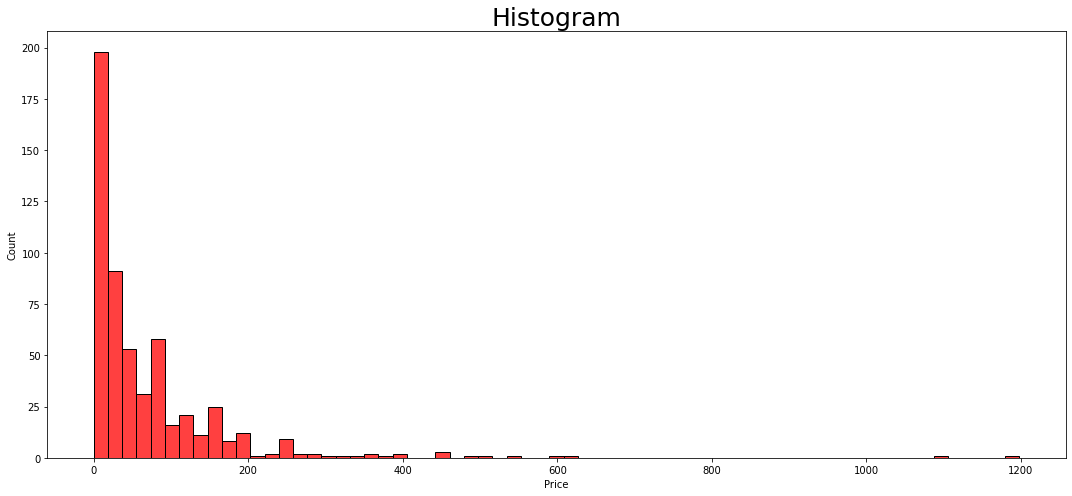

In [209]:
plt.rcParams['figure.figsize']=(15,7)
ax = s.histplot(data=data, x="Price", color = 'red')
plt.title('Histogram',fontsize=25)
plt.tight_layout()
plt.show()

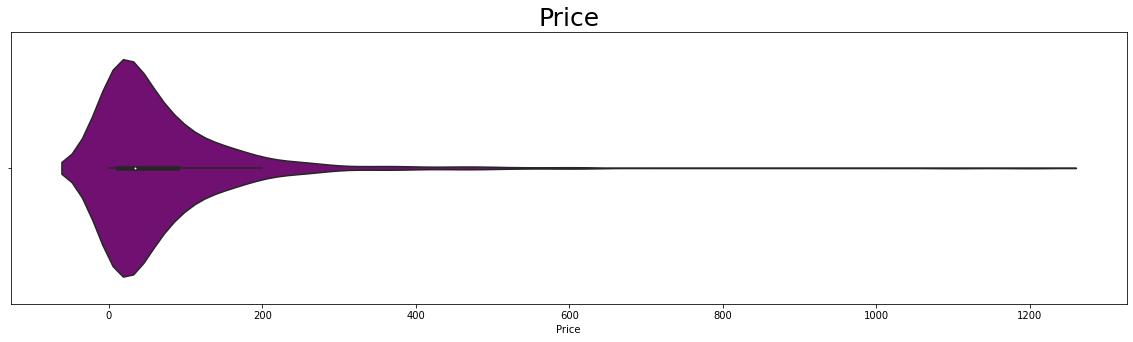

In [217]:
plt.figure(figsize=(20,5))
s.violinplot(x='Price',data=data, color = 'purple')
plt.title('Price',fontsize=25)
plt.show()

4. List out the categories with average price of product.

In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558 entries, 2 to 13511
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   uuid              558 non-null    object
 1   price_string      558 non-null    object
 2   price_string_unf  31 non-null     object
 3   product_type      558 non-null    object
 4   level_1           557 non-null    object
 5   category          558 non-null    object
 6   Currency          558 non-null    object
 7   Price             558 non-null    object
dtypes: object(8)
memory usage: 39.2+ KB


In [191]:
data['Price'] = data['Price'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558 entries, 2 to 13511
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   uuid              558 non-null    object 
 1   price_string      558 non-null    object 
 2   price_string_unf  31 non-null     object 
 3   product_type      558 non-null    object 
 4   level_1           557 non-null    object 
 5   category          558 non-null    object 
 6   Currency          558 non-null    object 
 7   Price             558 non-null    float64
dtypes: float64(1), object(7)
memory usage: 39.2+ KB


In [199]:
answer = data[['category','Price']].groupby(['category']).mean()
display(answer)

,Price
category,
Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz,125.230262
QXJ0IHN1cHBsaWVz,19.471053
QmFieWNhcmU,196.509091
RWxlY3Ryb25pY3M,60.258182
SG91c2Vob2xkIGFuZCBDbGVhbmluZw,76.199000
SGVhbHRo,32.557586
VG95cyBhbmQgR2FtZXM,32.448947
VG9vbHMgYW5kIGhvbWUgaW1wcm92ZW1lbnQ,82.223500
YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl,34.745067


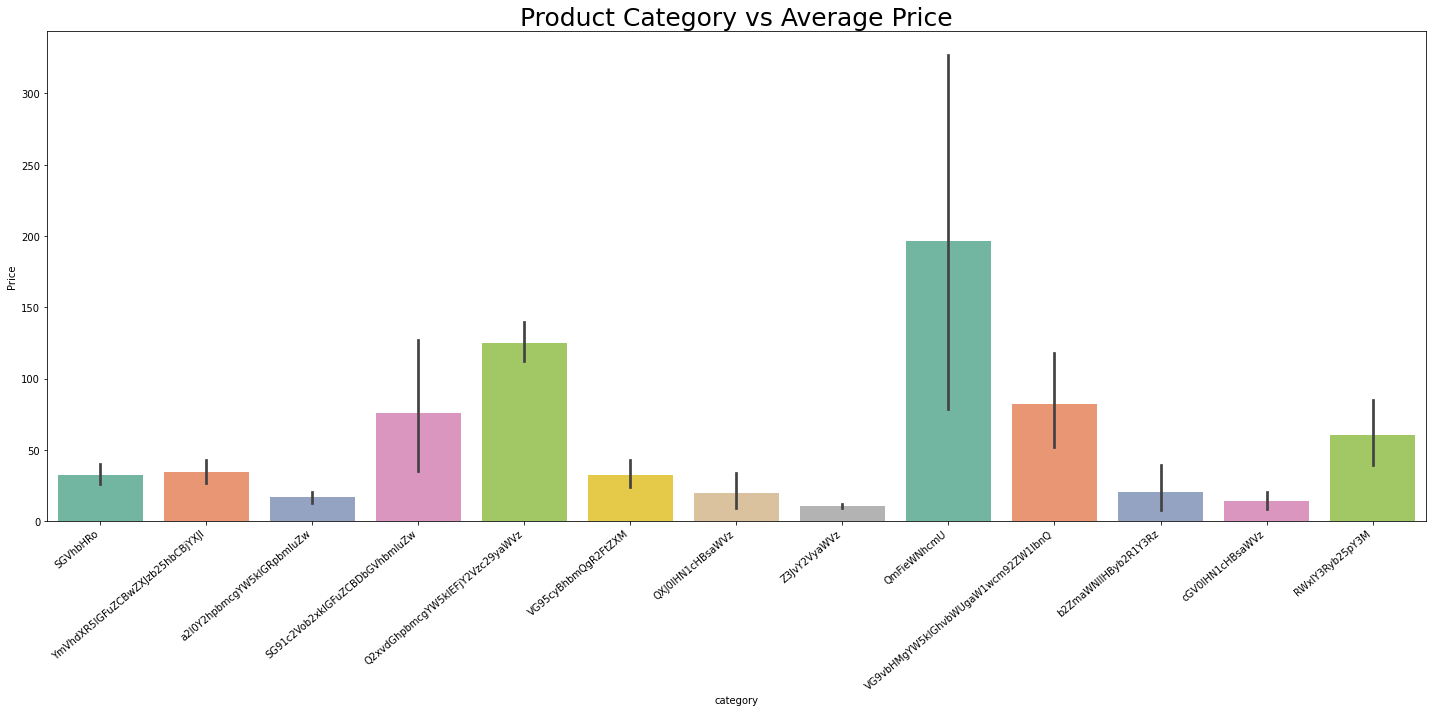

In [201]:
plt.rcParams['figure.figsize']=(20,10)
ax = s.barplot(x = data['category'],y = data['Price'],data = data, palette='Set2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Product Category vs Average Price',fontsize=25)
plt.tight_layout()
plt.show()